# Propagation of Hole waveguide (Antiguide)

Empty hole in glass. N0 configuration in Bird


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real, plotlogf_imag
from scipy.optimize import newton
from scipy.integrate import quad
from IPython.display import Video

import json

plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1, 1.44], wl=1e-6, symmetric=True)


In [3]:
def quadratic_piecewise(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: .25-x**2, 0]
    return np.piecewise(x, conds, funcs)

def uneven_cubic(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: 5*(x+.1)*(.25-x**2), 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [4]:
# Set input function
f0 = uneven_cubic
f0_shifted = lambda x: f0(x) + 1
# Set input field type
field_type = 'TE'

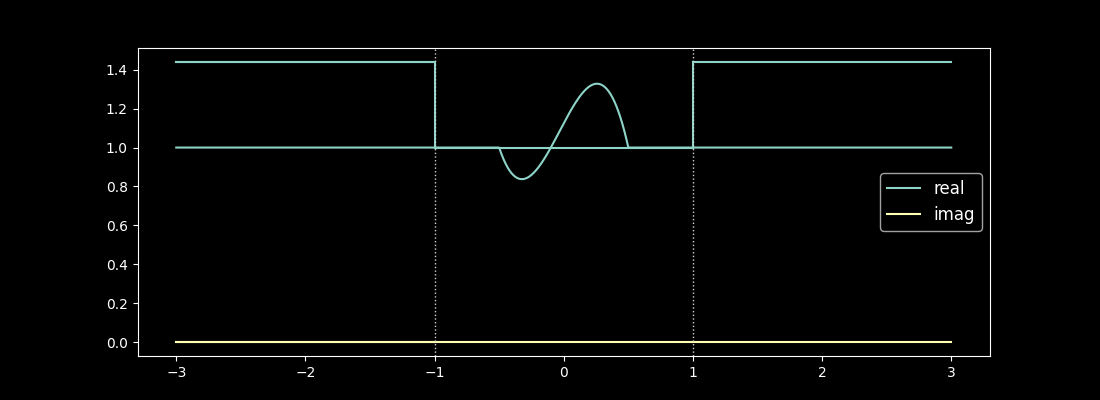

In [5]:
A.plot_refractive_index()
A.add_1d_plot(f0_shifted)

# Check for guided modes

Doesn't seem like it should have any

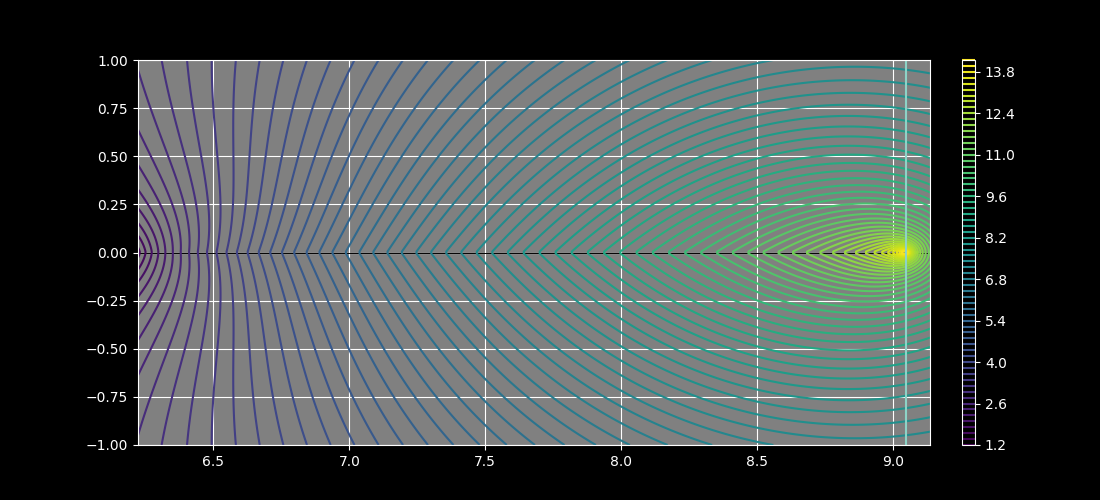

In [6]:
A.determinant_plot(.99*A.K_low, 1.01*A.K_high, -1, 1, plane='Beta', mode_type='guided');

No guided modes.

## Leaky Modes

In Z plane now

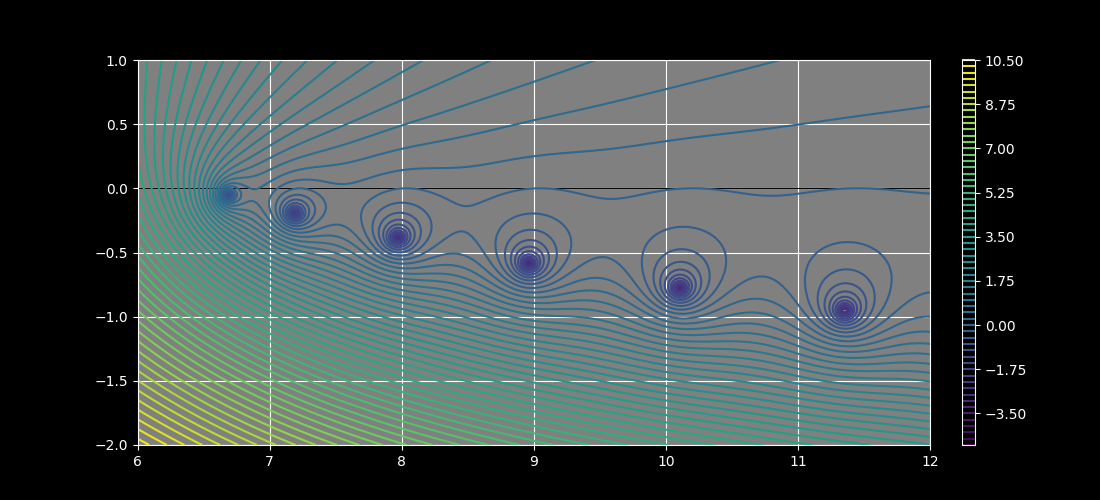

In [7]:
A.determinant_plot(6, 12, -2, 1);

In [8]:
Z_leaky_even = newton(A.determinant, np.array(6.8-.05j))
print(Z_leaky_even)
A.plot_points(Z_leaky_even)

[6.68512884-0.05373814j]


In [9]:
Z_leaky_odd = newton(A.determinant, np.array(7.1 -.1j))
print(Z_leaky_odd)
A.plot_points(Z_leaky_odd)

[7.18938517-0.19591924j]


In [10]:
F_leaky_even = A.fields(Z_leaky_even)
F_leaky_odd = A.fields(Z_leaky_odd)


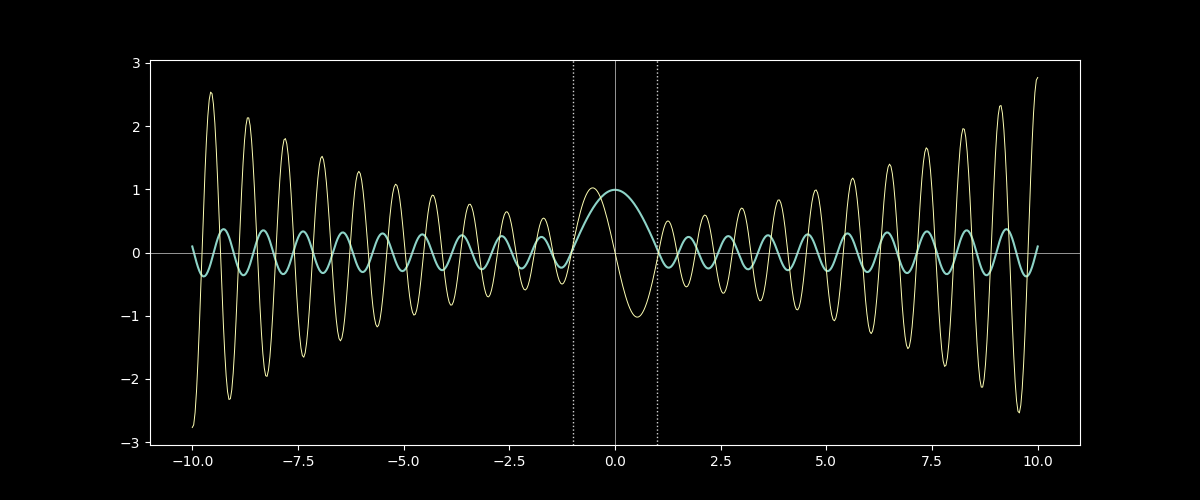

In [11]:
xs = np.linspace(-10, 10, 600)
A.plot_field_1d(F_leaky_even, xs=xs, linewidth=1.5);
A.add_1d_plot(F_leaky_odd, xs=xs, linewidth=.7);

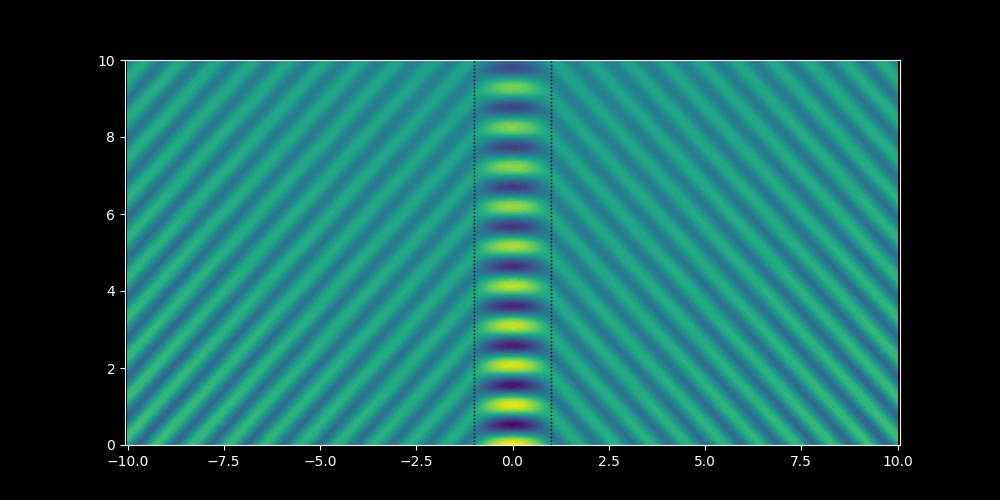

In [12]:
A.plot_field_2d(F_leaky_even, xs=xs, zmin=0, zmax=10, zref=500, colorbar=False, figsize=(10,5))
plt.axis('equal');

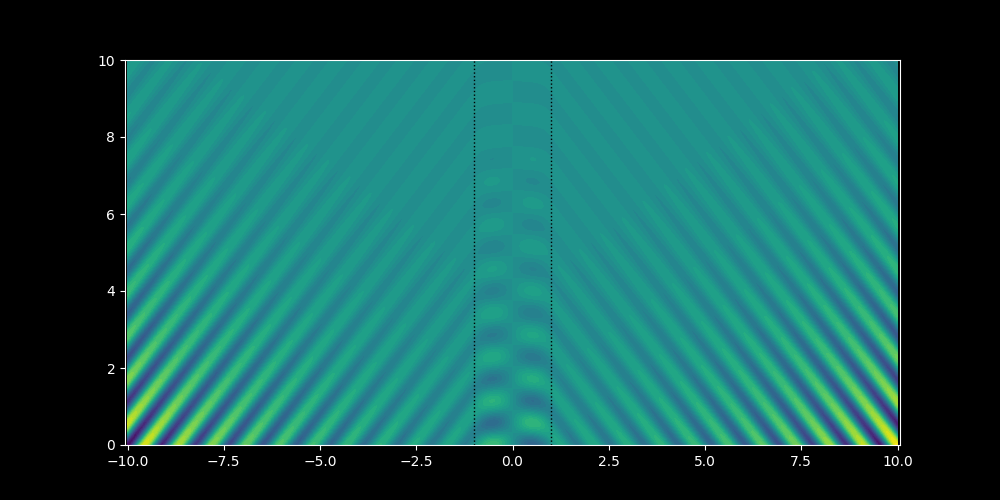

In [13]:
A.plot_field_2d(F_leaky_odd, xs=xs, zmin=0, zmax=10, zref=500, colorbar=False, figsize=(10,5))
plt.axis('equal');

# Propagation of input



In [14]:
Propagator_Class = A.propagator()
N = A.normalizer('ours')

In [15]:
P1e = Propagator_Class(A.real_contour(.001, 6, 100), f0=f0, Lx=-.5, Rx=.5, Normalizer=N)
P1o = Propagator_Class(A.real_contour(.001, 6, 100), f0=f0, Lx=-.5, Rx=.5, sign=-1, Normalizer=N)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

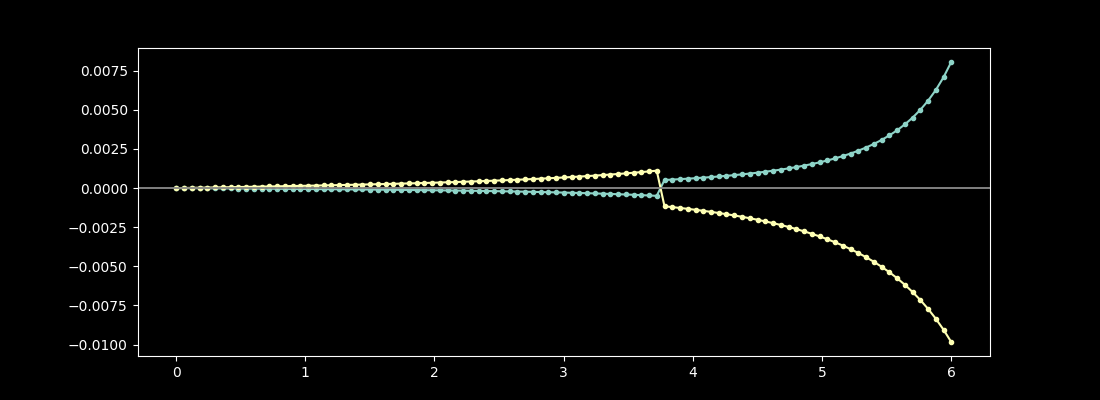

In [16]:
plt.close('all')
P1e.plot_transform()
P1o.plot_transform(ax=plt.gca())


In [17]:
P2e = Propagator_Class(A.real_contour(6, 7, 100), f0=f0, Lx=-.5, Rx=.5, Normalizer=N)
P2o = Propagator_Class(A.real_contour(6, 7, 100), f0=f0, Lx=-.5, Rx=.5, sign=-1, Normalizer=N)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

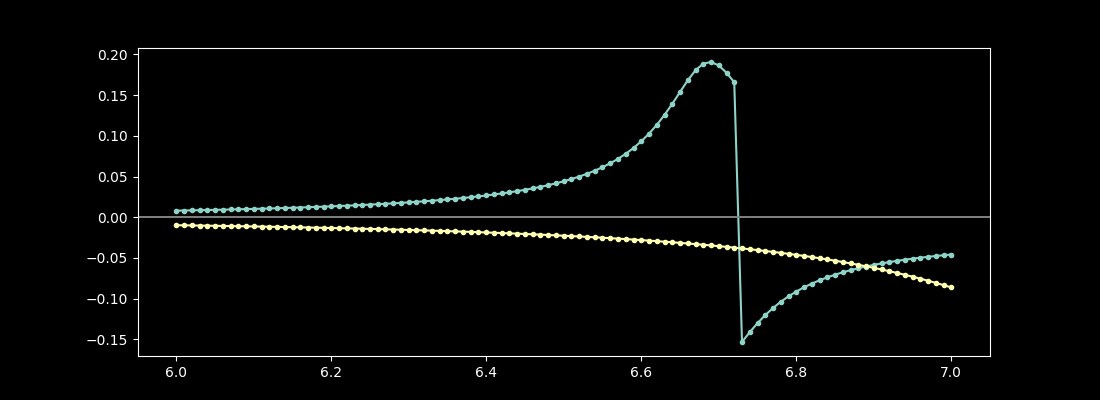

In [18]:
plt.close('all')
P2e.plot_transform()
P2o.plot_transform(ax=plt.gca())

In [19]:
P3e = Propagator_Class(A.real_contour(7, A.Z_evanescent.real, 200), f0=f0, Lx=-.5, Rx=.5, Normalizer=N)
P3o = Propagator_Class(A.real_contour(7, A.Z_evanescent.real, 200), f0=f0, Lx=-.5, Rx=.5, sign=-1, Normalizer=N)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

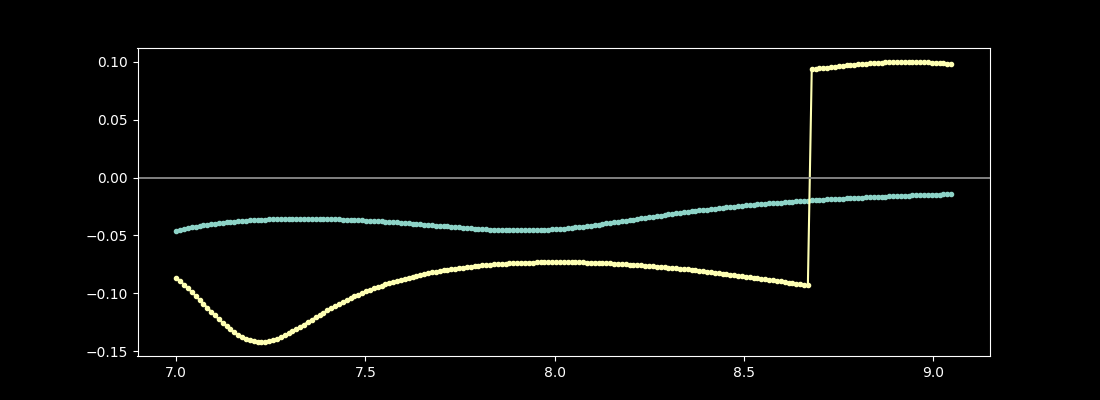

In [20]:
plt.close('all')
P3e.plot_transform()
P3o.plot_transform(ax=plt.gca())

In [21]:
E1e = Propagator_Class(A.real_contour(A.Z_evanescent.real, 14, 100), f0=f0, Lx=-.5, Rx=.5, Normalizer=N)
E1o = Propagator_Class(A.real_contour(A.Z_evanescent.real, 14, 100), f0=f0, Lx=-.5, Rx=.5, sign=-1, Normalizer=N)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

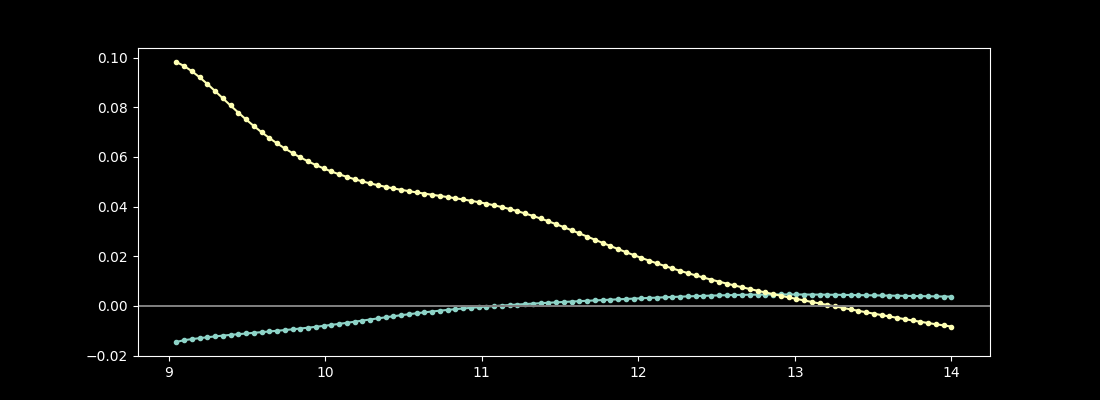

In [22]:
plt.close('all')
E1e.plot_transform()
E1o.plot_transform(ax=plt.gca())

In [23]:
E2e = Propagator_Class(A.real_contour(14, 20, 150), f0=f0, Lx=-.5, Rx=.5, Normalizer=N)
E2o = Propagator_Class(A.real_contour(14, 20, 150), f0=f0, Lx=-.5, Rx=.5, sign=-1, Normalizer=N)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

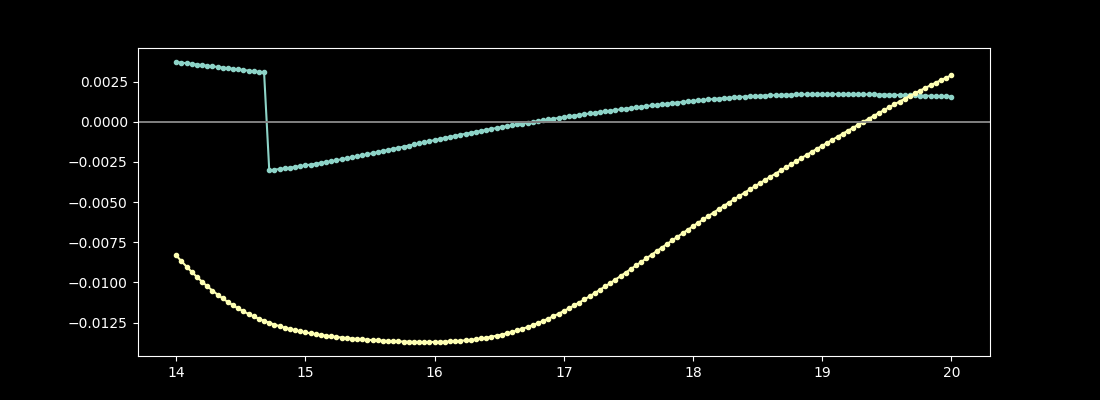

In [24]:
plt.close('all')
E2e.plot_transform()
E2o.plot_transform(ax=plt.gca())

In [25]:
E3e = Propagator_Class(A.real_contour(20, 50, 200), f0=f0, Lx=-.5, Rx=.5, Normalizer=N)
E3o = Propagator_Class(A.real_contour(20, 50, 200), f0=f0, Lx=-.5, Rx=.5, sign=-1, Normalizer=N)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

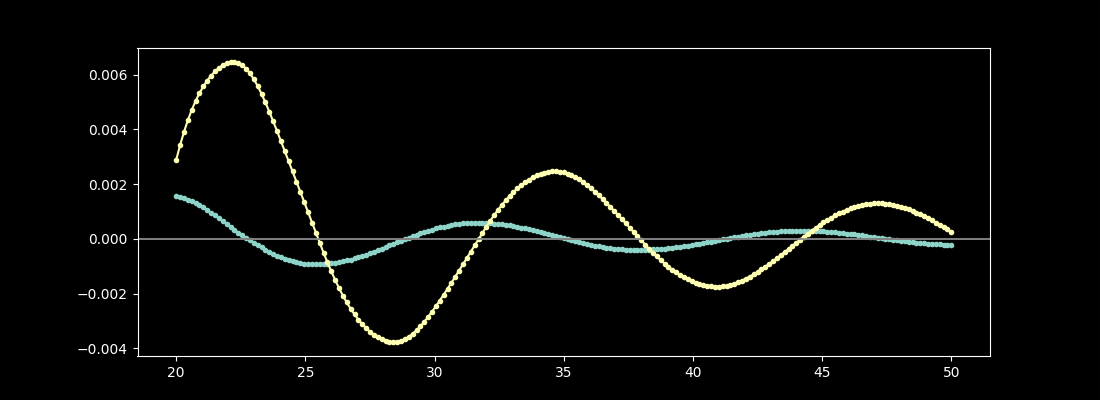

In [26]:
plt.close('all')
E3e.plot_transform()
E3o.plot_transform(ax=plt.gca())

### Combine propagators into one function

In [28]:
Propagating_Integrators = [
    P1e,
    P1o, 
    P2e,
    P2o,
    P3e,
    P3o,
]

Evanescent_Integrators = [
    E1e,
    E1o, 
    E2e,
    E2o,
    E3e,
    E3o,
]

prop_x = lambda x: sum([P.slice_propagate(x) for P in Propagating_Integrators])
ev_x = lambda x: sum([P.slice_propagate(x) for P in Evanescent_Integrators])
full_x = lambda x: prop_x(x) + ev_x(x)

Prop = lambda x, z: sum([P.propagate(x, z) for P in Propagating_Integrators])
Ev = lambda x, z: sum([P.propagate(x, z) for P in Evanescent_Integrators])
Full = lambda x, z : Prop(x, z) + Ev(x, z)

diff = lambda x: full_x(x) - f0(x)

# 1D Plot


In [29]:
xs = np.linspace(-2, 2, 1000)


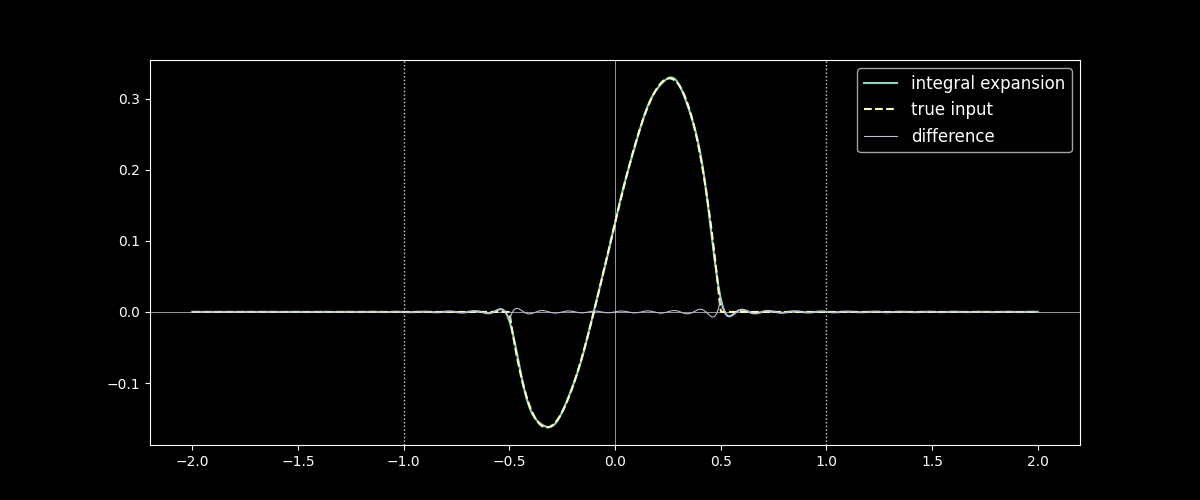

In [30]:
A.plot_field_1d(full_x, xs=xs, label='integral expansion');
A.add_1d_plot(f0, xs=xs, linestyle='--', label='true input')
A.add_1d_plot(diff, xs=xs, label='difference', linewidth=.8)

## Slice along Z axis

In [85]:
z0 = 0
constant_variable = 'x'

prop_z = lambda z: sum([P.slice_propagate(z, slice_at=z0, constant_variable='x') for P in Propagating_Integrators])
ev_z = lambda z: sum([P.slice_propagate(z, slice_at=z0, constant_variable='x') for P in Evanescent_Integrators])
full_z = lambda z: prop_z(z) + ev_z(z)

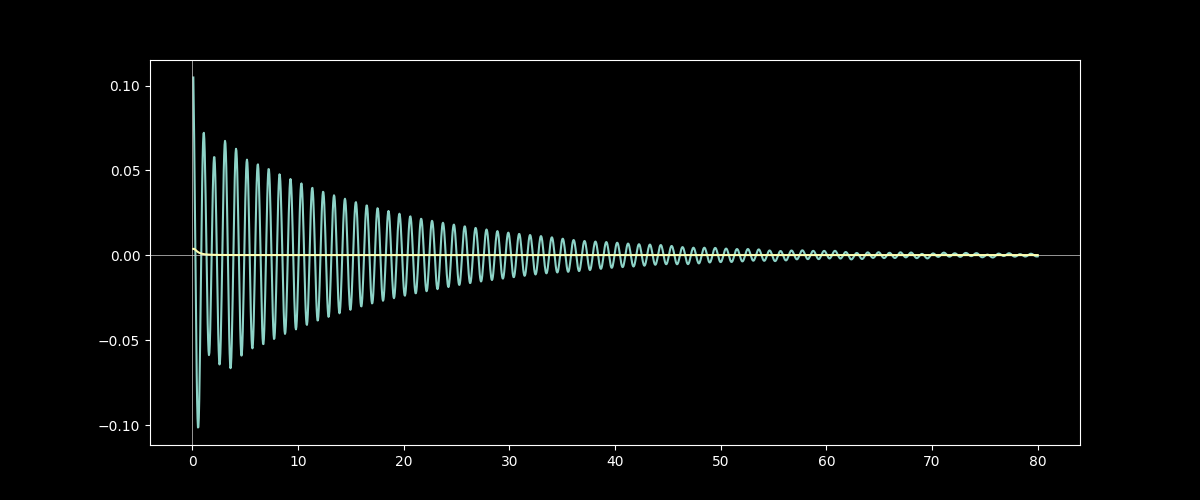

In [42]:
xs = np.linspace(0.1, 80, 2000)
A.plot_field_1d(prop_z, xs=xs, plot_Rhos=False);
A.add_1d_plot(ev_z, xs=xs)

## 2D Plots

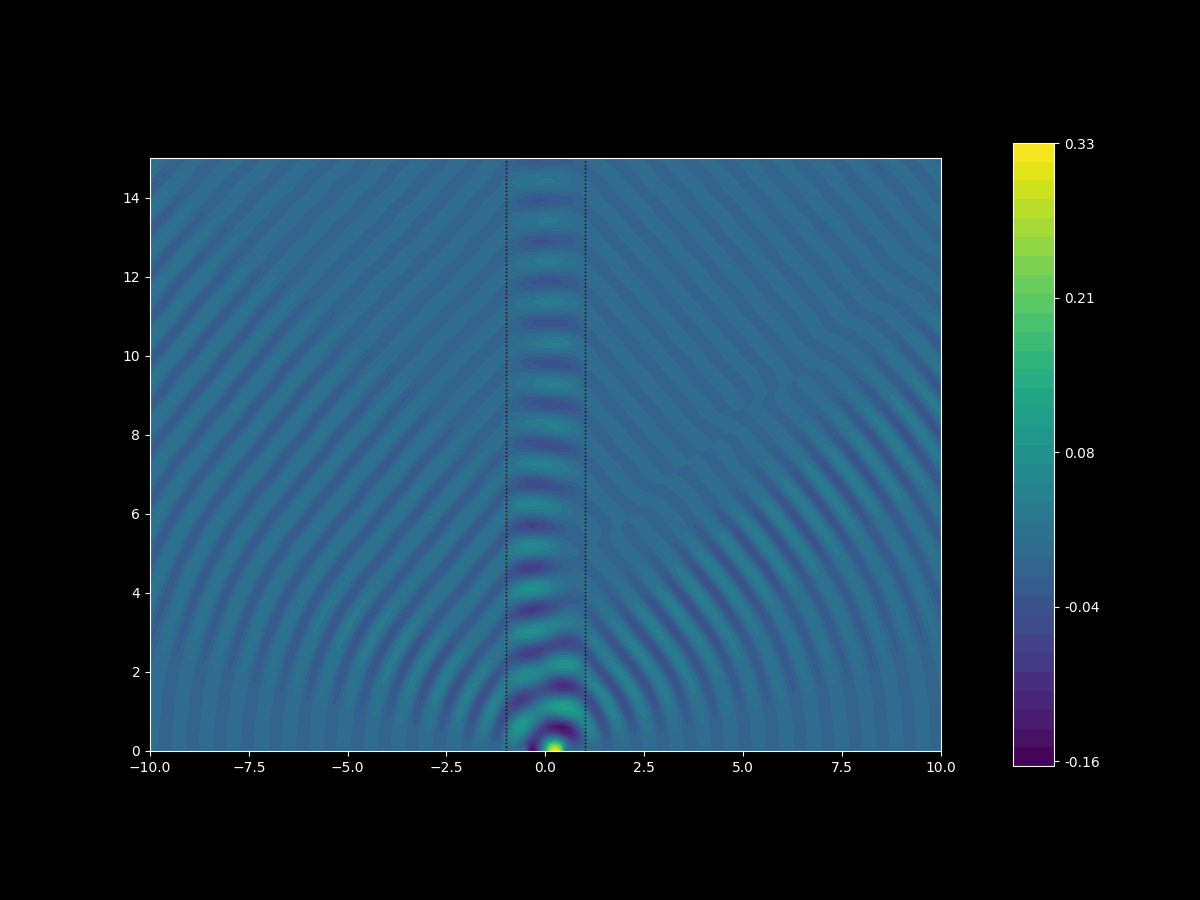

In [56]:
xs = np.linspace(-10, 10, 500)
A.plot_field_2d(Full, xs=xs, zmin=0, zmax=15, zref=100, maxdim=12);


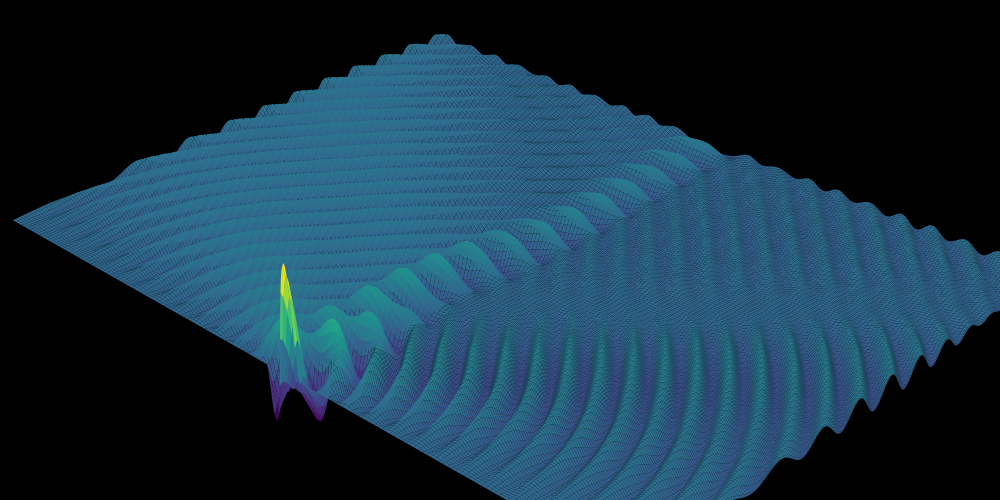

In [57]:
A.plot_field_2d_surface(Full, xs=xs, colorbar=False, zoom=3.5,
                        azim=-47, elev=30, 
                        zmax=15, zref=200,
                        rstride=1, cstride=3);

## Compare to leaky mode

## Forming leaky mode from contour integral

Leaky modes should arise from residuals when deforming contour of integration to steepest descent path.  But I don't know how to calculate the residuals analytically.  Here I try to do it numerically by doing a circular contour integration around a leaky mode propagation constant in the complex plane.  First I'll grab that propagation constant in the Z plane:

### Paper method

We discovered from the notebook Integrand/Full/Exact_Delta_Integrand_and_Contour_Integrals that with the paper method there are poles in the negative real part of the complex plane that appear to work.  These appear at what would be "leaky" mode_types with negative real parts.  Need to understand how it is that these can give correct decay and propagation direction.

In [74]:
P_leaky_even_e = Propagator_Class(A.circular_contour(Z_leaky_even, 1e-4, 10, orientation='cw'), f0=f0, Lx=-.5, Rx=.5)
P_leaky_even_o = Propagator_Class(A.circular_contour(Z_leaky_even, 1e-4, 10, orientation='cw'), f0=f0, Lx=-.5, Rx=.5, sign=-1)


In [75]:
P_leaky_odd_e = Propagator_Class(A.circular_contour(Z_leaky_odd, 1e-4, 10, orientation='cw'), f0=f0, Lx=-.5, Rx=.5)
P_leaky_odd_o = Propagator_Class(A.circular_contour(Z_leaky_odd, 1e-4, 10, orientation='cw'), f0=f0, Lx=-.5, Rx=.5, sign=-1)


In [90]:
P_ls_e = [P_leaky_even_e, P_leaky_odd_e]
P_ls_o = [P_leaky_even_o, P_leaky_odd_o]
P_ls = P_ls_e + P_ls_o

full_leaky = lambda x : sum([P.slice_propagate(x) for P in P_ls])
Full_leaky = lambda x, z : sum([P.propagate(x, zs=z) for P in P_ls])
Leaky_Diff = lambda x,z: np.abs(Full(x,z) - Full_leaky(x, z))

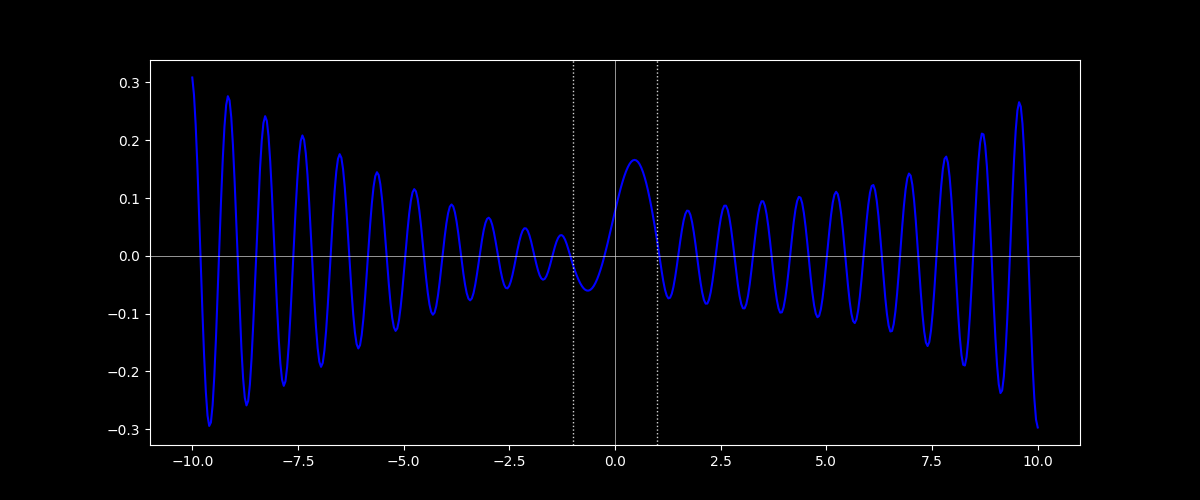

In [91]:
A.plot_field_1d(full_leaky, xs=xs, part='real', color='blue');

### 2d Plots of real field and leaky mode field

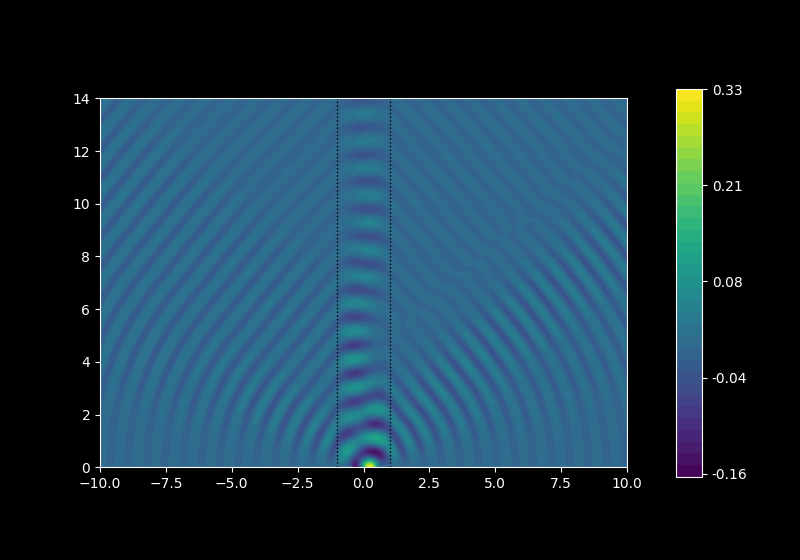

In [92]:
fig, ax = A.plot_field_2d(Full, xs=xs, zmin=0, zmax=14, zref=200, maxdim=8, colorbar=True);

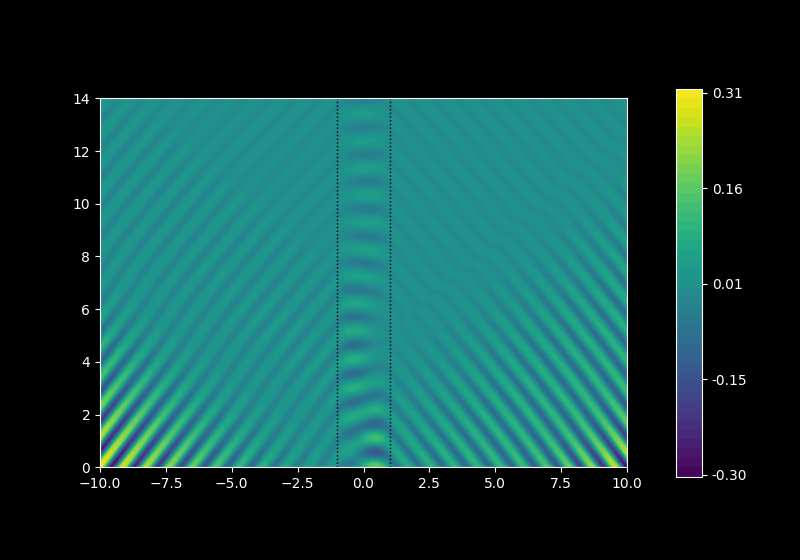

In [93]:
A.plot_field_2d(Full_leaky, xs=xs, zmin=0, zmax=14, zref=200, maxdim=8, colorbar=True);

Difference between fields above.

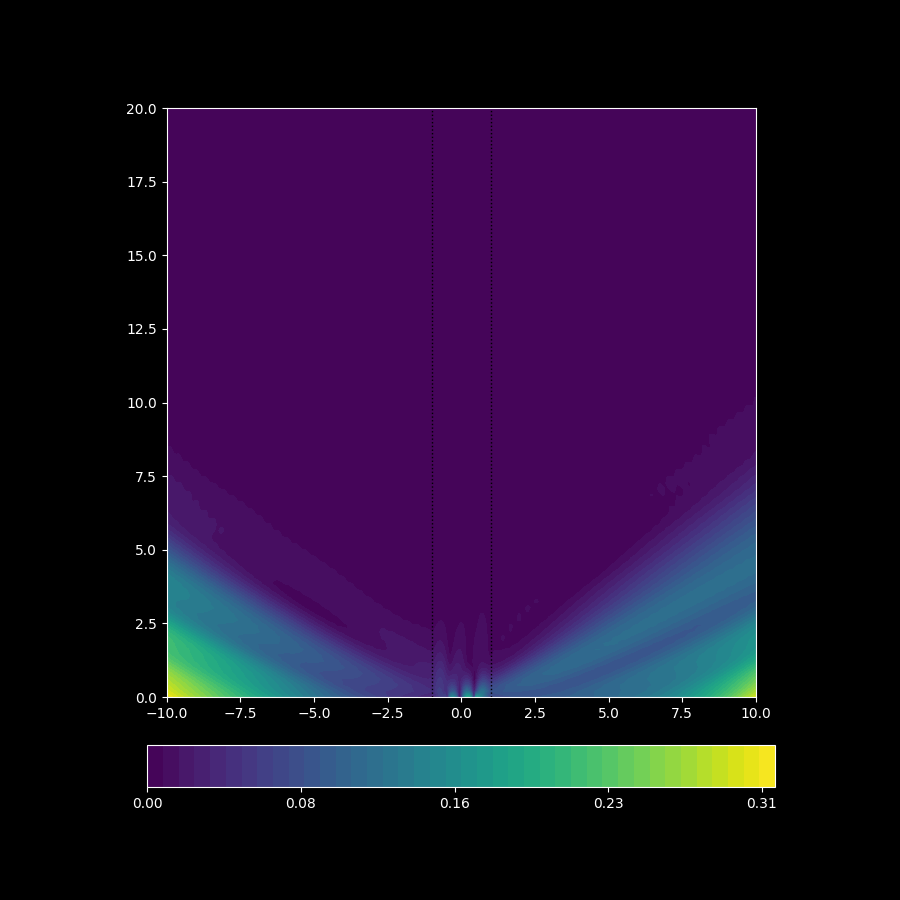

In [94]:
A.plot_field_2d(Leaky_Diff, xs=xs, zmin=0, zmax=20, zref=100);


# Asymptotics

In direction of propagation.

In [83]:
slice_at_x = 0.1
constant_variable = 'x'

full_z_leaky = lambda z: sum([P.slice_propagate(z, slice_at=slice_at_x, constant_variable=constant_variable) for P in P_ls])


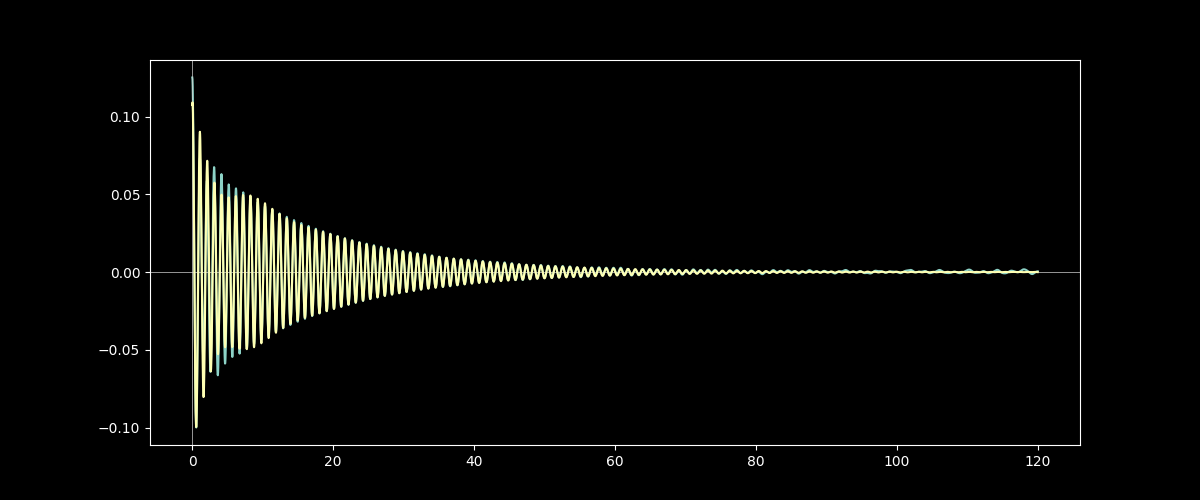

In [86]:
A.plot_field_1d(full_z, xs=np.linspace(0,120,4000), part='real', plot_Rhos=False);
A.add_1d_plot(full_z_leaky, xs=np.linspace(0,120,4000), part='real');


# Animations

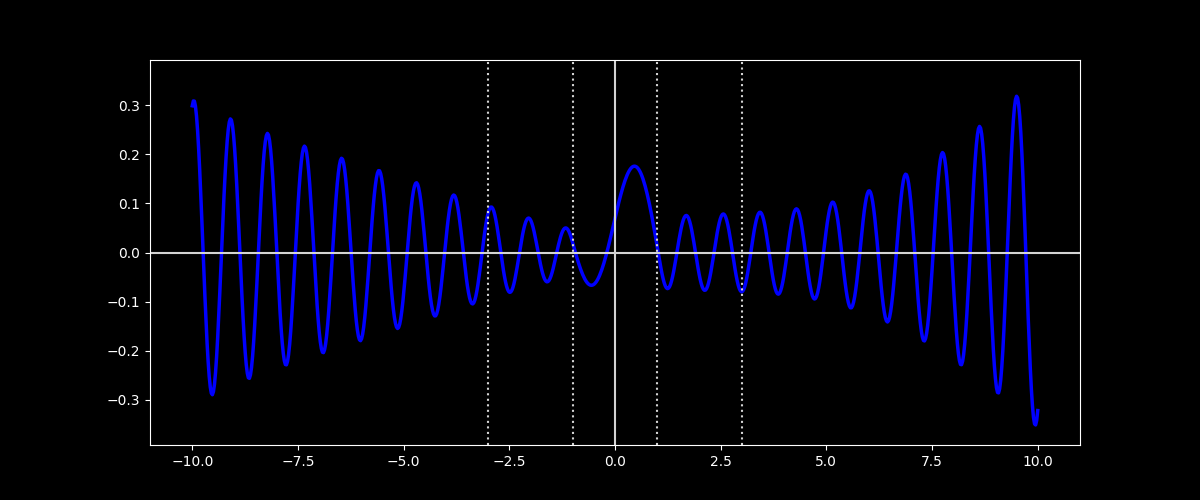

In [121]:
A.animate_field_1d(full_leaky, 'leaky_uneven_input_1d', xs=xs, linewidth=2.5, secs=3, fps=32)

In [122]:
Video('leaky_uneven_input_1d.mp4', html_attributes="controls loop")


In [123]:
# A.animate_field_2d(Full_leaky, 'leaky_mode_antiguide_contour_uneven_input',xs=xs, zs=np.linspace(0,10,300), 
#                    figsize=(10,5), secs=2)

In [124]:
Video('leaky_mode_antiguide_contour_uneven_input.mp4', html_attributes="controls loop")


Current issues in this:
- With our method, the modes converge to zero, using both leaky and guided mode types. 
- With paper method, modes converge to non-trivial result using leaky mode type, but to zero using guided mode type.
- Using the negative values of the propagation constants switches behavior for paper method, doesn't do anything for non-paper method.
- Overall it does look like we want guided mode type for leaky modes too, then just take complex roots of guided mode eigenvalue equation.  This gives correct direction of propagation/increase/outgoing-ness.


- If we use paper method, there is no pole where we need it to be.  We can integrate around a pole in the positive imaginary part of C.  In that case it's also mot outgoing because of issue with decay direction.  We can switch this by switching sign of z coordinate, but that's cheating.

### Leaky mode coefficient

In [64]:
integrand = lambda x: P1e.f0(x) * FsZ(x).conjugate()
alpha = quad(integrand, -1,1, complex_func=True)[0]
alpha

(0.3760763656953411+0.5849896599291433j)

Not clear how to normalize leaky modes though.

In [65]:
scale = .25/FsZ(0)

In [66]:
scale

array([0.02969895+0.04810642j])

In [71]:
Leaky_Diff = lambda x,z: Full(x,z) - .6*scale * FsZ(x,z)
Scaled_leaky = lambda x, z: .6*scale * FsZ(x,z)
scaled_leaky = lambda x: .6*scale * FsZ(x)

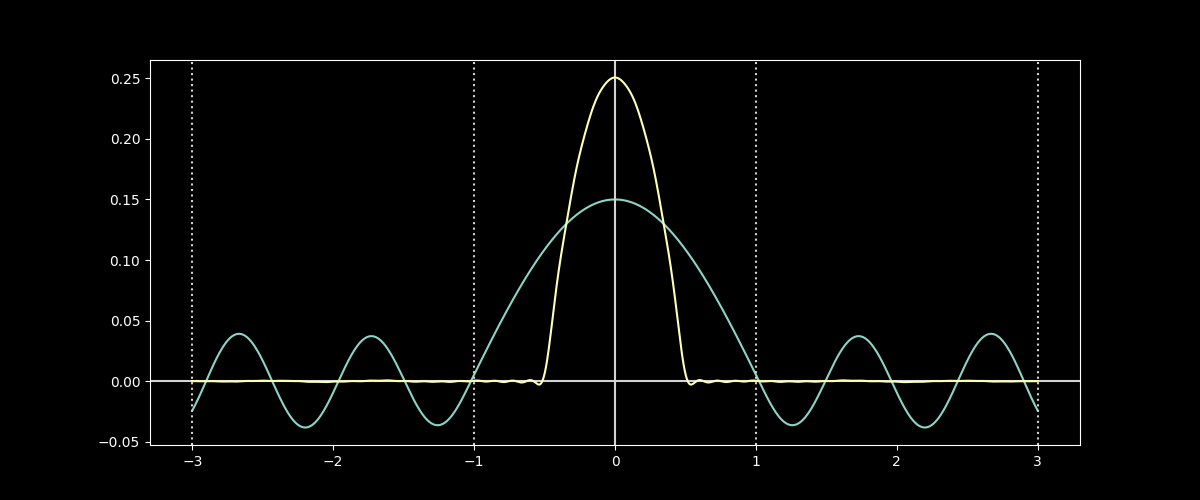

In [72]:
A.plot_field_1d(scaled_leaky);
A.add_1d_plot(full)

In [74]:
leaky_z = lambda z: .6*scale*FsZ([0],z)


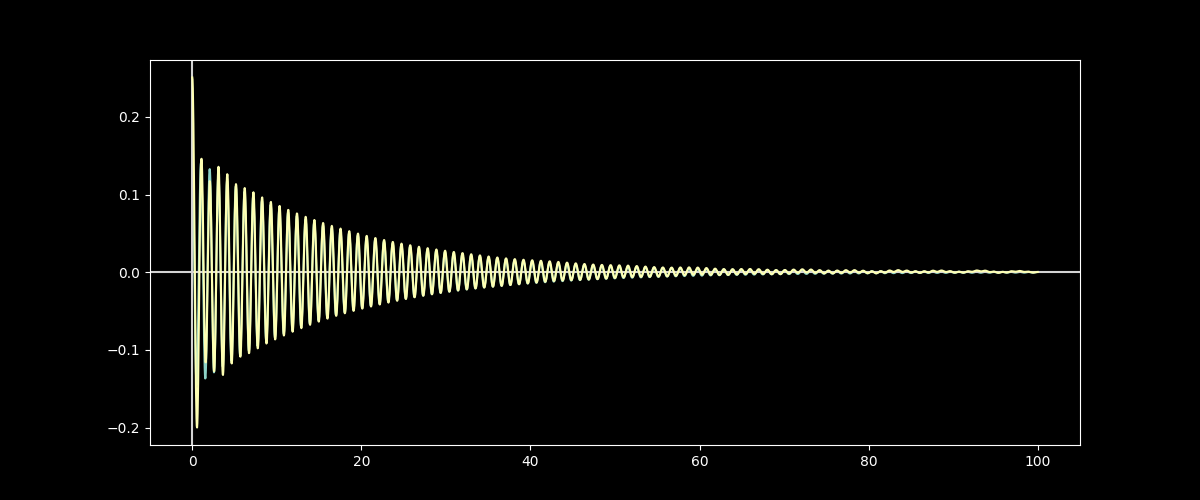

In [75]:
A.plot_field_1d(leaky_z, xs=np.linspace(0,100,3000), part='real', plot_Rhos=False);
A.add_1d_plot(full_z, xs=np.linspace(0,100,3000), part='real');


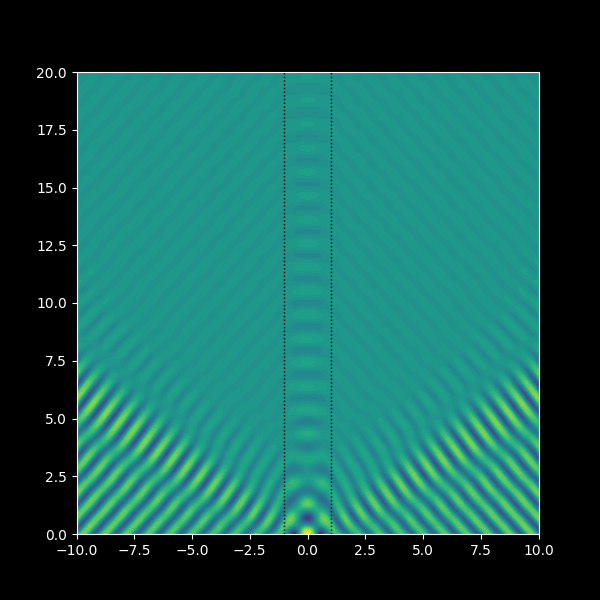

In [76]:
A.plot_field_2d(Leaky_Diff, xs=xs, zmin=0, zmax=20, zref=200, maxdim=6, levels=40, colorbar=False);


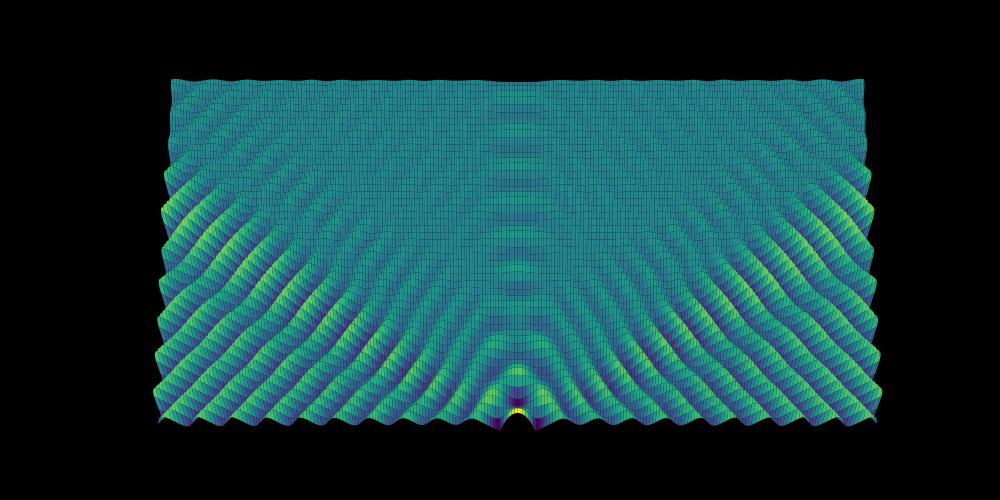

In [54]:
A.plot_field_2d_surface(Leaky_Diff, xs=xs, colorbar=False, zoom=2.5,
                        azim=-90, elev=75, 
                        zmax=10, zref=150,
                        rstride=3, cstride=3);